Reproducing the solution for linear regression proposed in [vector quantile regression: an optimal transport approach](https://arxiv.org/pdf/1406.4643). There is no code provided for this article.

Sampling has to be from the grid, otherwise we can not compute the derivative

In [1]:
from old_source_code.data import create_joint_x_y
from old_source_code.linear_quantile import solve_vqr_primal
import numpy as np

num_points_to_generate = 500
num_latent_points_to_generate = 500

X, Y = create_joint_x_y(num_points_to_generate)
X = np.concatenate([X, np.ones((num_points_to_generate, 1))], axis=1)

n, d = Y.shape
U = np.random.normal(size=(num_latent_points_to_generate, d))
m = U.shape[0]

nu = np.ones((n, 1)) / n
mu = np.ones((m, 1)) / m

result = solve_vqr_primal(Y, X, U, nu, mu)

Solving the linear program...


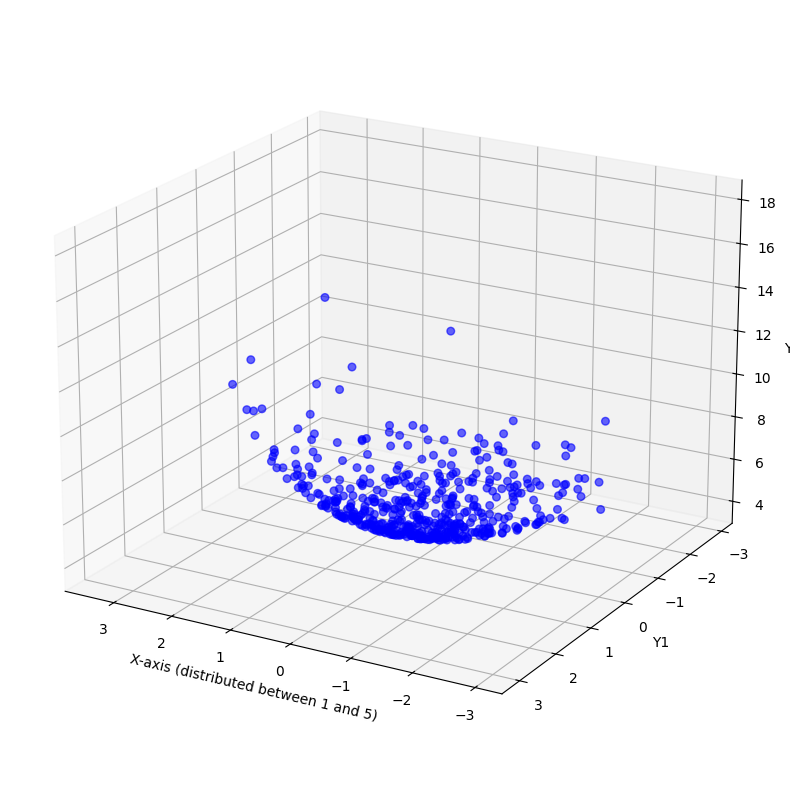

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

x = X[0, :]
b_u = result.eqlin['marginals'][num_points_to_generate:].reshape((U.shape[0], X.shape[1]), order='F')
phi_dual_potential = - b_u @ x

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(U[:,0 ], U[:, 1], phi_dual_potential, c='blue', marker='o', s=30, alpha=0.6)

ax.set_xlabel('X-axis (distributed between 1 and 5)')
ax.set_ylabel('Y1')
ax.set_zlabel('Y2')

ax.grid(True)
ax.view_init(elev=20, azim=120)

plt.show()

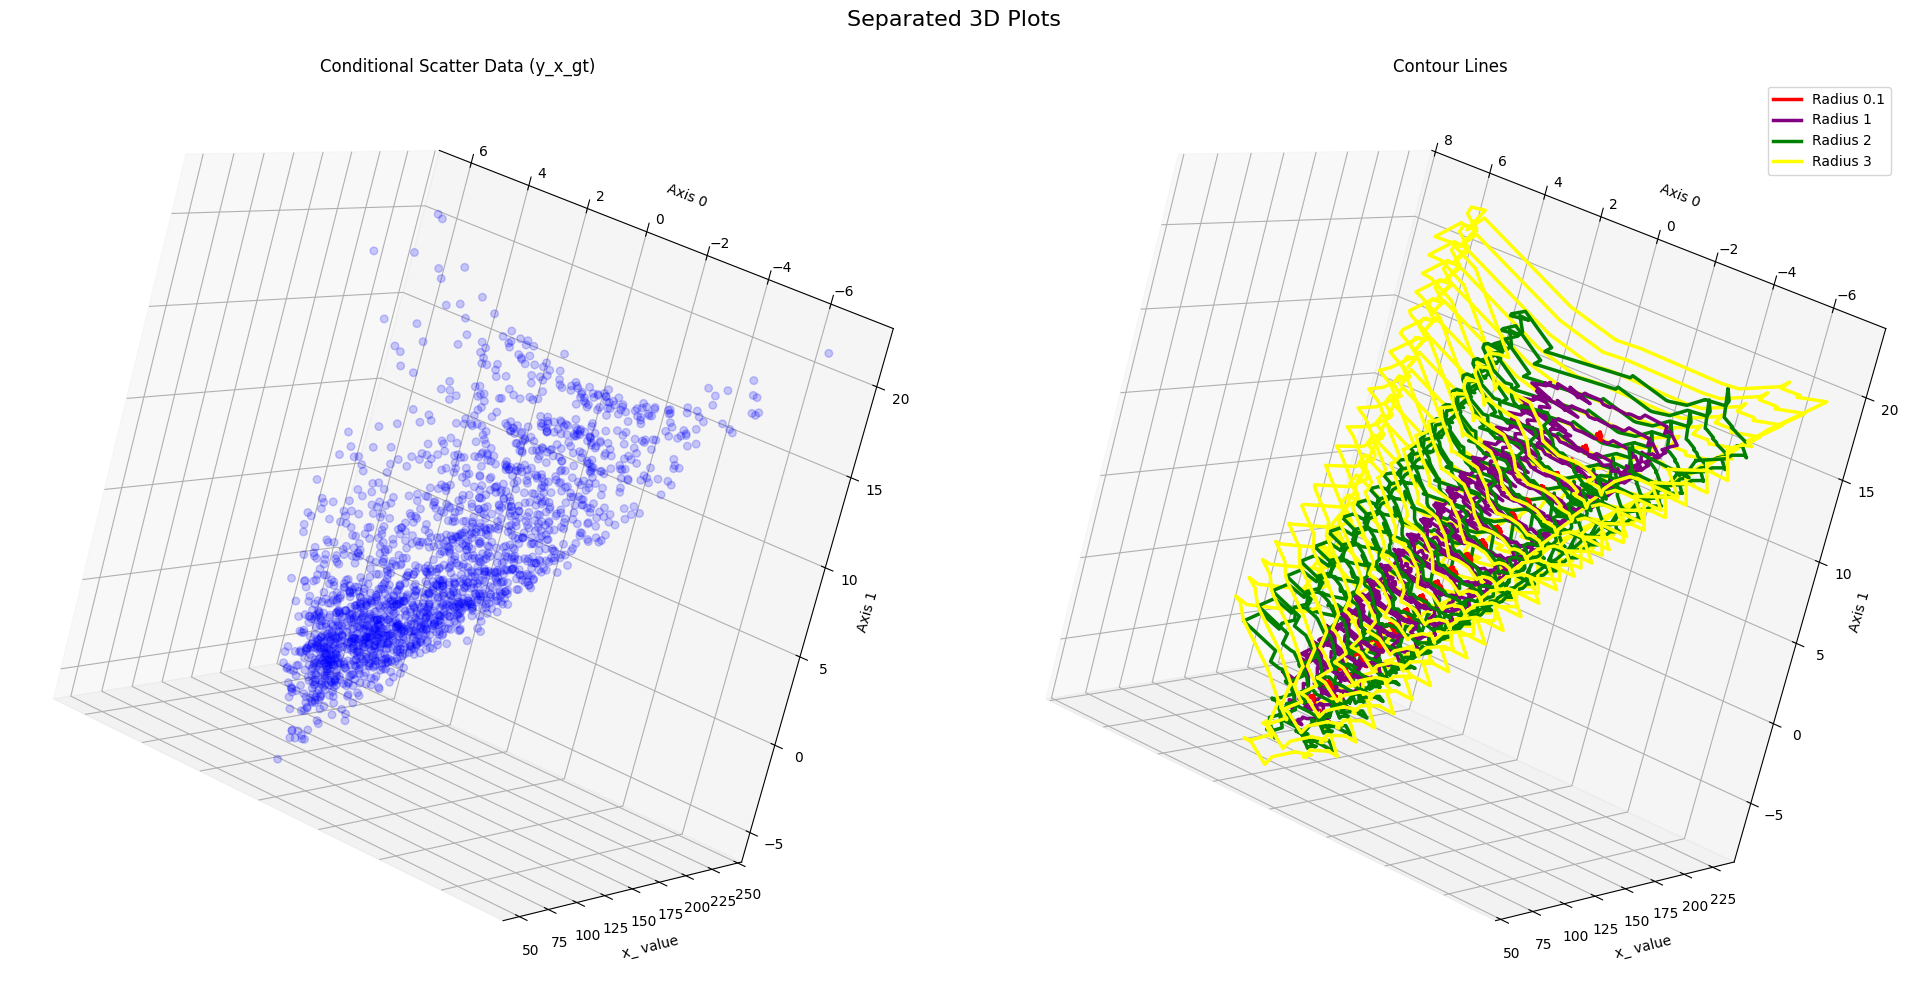

In [4]:
%matplotlib inline

from old_source_code.data import create_conditional_x
from old_source_code.jaccobian import estimate_gradients_for_points_knn

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10), subplot_kw={'projection': '3d'})
fig.suptitle('Separated 3D Plots', fontsize=16)


ax1.set_title('Conditional Scatter Data (y_x_gt)')
ax1.set_xlabel('Axis 0')
ax1.set_ylabel('Axis 1')
ax1.set_zlabel('x_ value')

for x_ in range(50, 250, 10):
    x = np.array([x_ / 100, 1])

    # This section is now active for the first plot
    _, y_x_gt = create_conditional_x(n_points=100, x_value=x[0])
    z_scatter = np.full(y_x_gt.shape[0], x_)
    ax1.scatter(y_x_gt[:, 0], y_x_gt[:, 1], z_scatter, color='blue', marker='o', s=30, alpha=0.2)

ax1.view_init(elev=-55, azim=154, roll=-83)

ax2.set_title('Contour Lines')
ax2.set_xlabel('Axis 0')
ax2.set_ylabel('Axis 1')
ax2.set_zlabel('x_ value')

loop_start_value = 50
for x_ in range(loop_start_value, 250, 10):
    x = np.array([x_ / 100, 1])

    colors = ['red', 'purple', 'green', 'yellow']
    radii = [0.1, 1, 2, 3]

    for contour_radius, color in zip(radii, colors):
        pi = np.linspace(-np.pi, np.pi, 100) # Use linspace for a perfectly smooth circle

        u = np.stack([
            contour_radius * np.cos(pi),
            contour_radius * np.sin(pi),
        ])

        b_u = result['eqlin']['marginals'][num_points_to_generate:].reshape((U.shape[0], X.shape[1]), order='F')
        phi_u = -b_u @ x
        pushforward_of_u = estimate_gradients_for_points_knn(U, phi_u, points_of_interest=u.T, k=5)

        z_line = np.full(pushforward_of_u.shape[0], x_)

        label = f'Radius {contour_radius}' if x_ == loop_start_value else ""
        ax2.plot(pushforward_of_u[:, 0], pushforward_of_u[:, 1], z_line, color=color, linewidth=2.5, label=label)

ax2.view_init(elev=-55, azim=154, roll=-83)
ax2.legend()

plt.tight_layout(rect=[0, 0, 1, 0.96]) # Adjust layout to make room for suptitle
plt.show()